# Build the neural network for prediction of the price of 2025

In [1]:
# Read the file
import pandas as pd
df1_2 = pd.read_csv("price_normalised3.csv")

In [2]:
df1_2

,Unnamed: 0,name,postcode,property_type,bedrooms,bathrooms,parking,schools,cost_text,train_station(m),CBD(m),population2022,population2023,population2024,population2025,income2022,income2023,income2024,income2025,price_label
0,5321,Room 6/8 Melwood Court Meadow Heights VIC 3048,3048,Apartment / Unit / Flat,1,1,0,0.3,130.000000,2131.1,19150.7,17364.0,16549.0,15773.0,15034.0,86498,88316,90176,92078,0
1,5569,30 Daly Boulevard Highton VIC 3216,3216,House,9,2,2,2.0,130.000000,2904.1,85109.1,59229.0,60753.0,62377.0,64109.0,184195,192855,201927,211432,0
2,640,62 Reserve Rd Grovedale VIC 3216,3216,House,1,2,2,1.0,140.000000,1809.3,87665.1,59229.0,60753.0,62377.0,64109.0,184195,192855,201927,211432,0
3,5570,1/57 Wanda Road Caulfield North VIC 3161,3161,House,1,1,0,0.6,140.000000,1432.7,9784.5,10418.0,10185.0,9957.0,9734.0,56454,58176,59951,61780,0
4,5571,Room 2/31 Stanley Street Frankston VIC 3199,3199,House,1,1,1,1.1,145.000000,916.1,53197.1,60500.0,59711.0,58932.0,58164.0,176387,182176,188161,194348,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6716,6157,3502/14-16 The Esplanade St Kilda VIC 3182,3182,Apartment / Unit / Flat,3,3,3,0.8,1153.846154,1923.6,7936.4,27813.0,26448.0,25151.0,23917.0,61492,63821,66238,68747,3
6717,6156,9 Lansdowne Street Blairgowrie VIC 3942,3942,House,3,2,3,3.3,1153.846154,43496.1,106670.1,2104.0,2128.0,2152.0,2177.0,44616,45495,46391,47305,3
6718,6155,901 & 902/85 Market Street South Melbourne VIC...,3205,Apartment / Unit / Flat,3,3,1,0.3,1384.615385,4576.3,30462.2,3182.0,3085.0,2990.0,2899.0,70585,72357,74173,76035,3
6719,6154,Upstairs 2C Staley Street Brunswick VIC 3056,3056,House,0,0,0,0.8,673.076923,590.8,5545.2,17310.0,16654.0,16022.0,15415.0,68842,72533,76422,80520,1


## Remove assumed outliers which may affect the performance of the model

### Assumer postcode areas which have less than 100 population and have less than average $1000 yearly income per person as outliers

In [3]:
outliers = []
for i in range(0, len(df1_2)):
    if i not in outliers:
        if df1_2['population2022'][i] < 100 or df1_2['income2022'][i] < 1000:
            outliers.append(i)

In [4]:
# number of such outliers
len(outliers)

39

In [5]:
# remove outliers
if len(outliers) > 0:
    df1_3 = df1_2.drop(df1_2.index[outliers])

In [6]:
df1_3 = df1_3.reset_index()

### Assume properties with 0 bedrooms as outliers

In [7]:
outliers2 = []
for i in range(0, len(df1_3)):
    if i not in outliers2:
        if df1_3['bedrooms'][i] == 0:
            outliers2.append(i)

In [8]:
# number of such outliers
len(outliers2)

76

In [9]:
# remove outliers
if len(outliers2) > 0:
    df1_4 = df1_3.drop(df1_3.index[outliers2])

In [24]:
df1_4.to_csv('cleaned_df.csv')

## Start to build the model

In [10]:
df1 = df1_4[['property_type', 'bedrooms', 'bathrooms', 'parking','schools', 'cost_text', \
    'train_station(m)', 'CBD(m)', 'population2022', 'income2022']]

In [11]:
# one-hot encoding for the two categorical features
df_dummy = pd.get_dummies(df1['property_type'], \
    prefix=['property_type'], drop_first=False, dummy_na=False)
df1_1 = pd.concat([df1, df_dummy], axis=1)
df1_1 = df1_1.drop(['property_type'], axis = 1)

In [12]:
df1_1

,bedrooms,bathrooms,parking,schools,cost_text,train_station(m),CBD(m),population2022,income2022,['property_type']_Acreage / Semi-Rural,...,['property_type']_House,['property_type']_New Apartments / Off the Plan,['property_type']_New House & Land,['property_type']_Penthouse,['property_type']_Rural,['property_type']_Semi-Detached,['property_type']_Studio,['property_type']_Terrace,['property_type']_Townhouse,['property_type']_Villa
0,1,1,0,0.3,130.000000,2131.1,19150.7,17364.0,86498,0,...,0,0,0,0,0,0,0,0,0,0
1,9,2,2,2.0,130.000000,2904.1,85109.1,59229.0,184195,0,...,1,0,0,0,0,0,0,0,0,0
2,1,2,2,1.0,140.000000,1809.3,87665.1,59229.0,184195,0,...,1,0,0,0,0,0,0,0,0,0
3,1,1,0,0.6,140.000000,1432.7,9784.5,10418.0,56454,0,...,1,0,0,0,0,0,0,0,0,0
4,1,1,1,1.1,145.000000,916.1,53197.1,60500.0,176387,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6676,3,2,4,1.4,1038.461538,358.8,1621.2,8538.0,82000,0,...,0,0,0,0,0,0,0,0,0,0
6677,3,3,3,0.8,1153.846154,1923.6,7936.4,27813.0,61492,0,...,0,0,0,0,0,0,0,0,0,0
6678,3,2,3,3.3,1153.846154,43496.1,106670.1,2104.0,44616,0,...,1,0,0,0,0,0,0,0,0,0
6679,3,3,1,0.3,1384.615385,4576.3,30462.2,3182.0,70585,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
X=df1_1.drop("cost_text", axis=1).values
y=df1_1[["cost_text"]].values

In [14]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() 
# Generating the standardized values of X and y
X=scaler.fit_transform(X)
y=scaler.fit_transform(y)

In [15]:
# split the dataset to train and test datasets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) 

In [17]:
# define metrics
from keras import backend as K
def R2(y, y_hat):
    ss_res = K.sum(K.square(y - y_hat)) 
    ss_tot = K.sum(K.square(y - K.mean(y))) 
    return ( 1 - ss_res/(ss_tot + K.epsilon()) )

In [19]:
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt
model = Sequential()
model.add(Dense(units=12, input_dim=22, kernel_initializer='normal', activation='relu'))
model.add(Dense(units=12, kernel_initializer='normal', activation='relu'))
model.add(Dense(1, kernel_initializer='normal'))
model.compile(loss='mean_squared_error', optimizer='adam', metrics=[R2])
model.fit(X_train, y_train ,batch_size = 64, epochs = 197, verbose=1)

Epoch 1/197
83/83 [==============================] - 1s 2ms/step - loss: 0.9534 - R2: 0.0264
Epoch 2/197
83/83 [==============================] - 0s 2ms/step - loss: 0.6546 - R2: 0.3147
Epoch 3/197
83/83 [==============================] - 0s 2ms/step - loss: 0.5472 - R2: 0.4420
Epoch 4/197
83/83 [==============================] - 0s 2ms/step - loss: 0.5171 - R2: 0.4627
Epoch 5/197
83/83 [==============================] - 0s 2ms/step - loss: 0.4971 - R2: 0.4846
Epoch 6/197
83/83 [==============================] - 0s 2ms/step - loss: 0.4825 - R2: 0.4970
Epoch 7/197
83/83 [==============================] - 0s 2ms/step - loss: 0.4716 - R2: 0.5125
Epoch 8/197
83/83 [==============================] - 0s 2ms/step - loss: 0.4617 - R2: 0.5219
Epoch 9/197
83/83 [==============================] - 0s 2ms/step - loss: 0.4559 - R2: 0.5311
Epoch 10/197
83/83 [==============================] - 0s 1ms/step - loss: 0.4489 - R2: 0.5316
Epoch 11/197
83/83 [==============================] - 0s 1ms/step - l

83/83 [==============================] - 0s 2ms/step - loss: 0.3776 - R2: 0.6084
Epoch 175/197
83/83 [==============================] - 0s 1ms/step - loss: 0.3813 - R2: 0.5956
Epoch 176/197
83/83 [==============================] - 0s 1ms/step - loss: 0.3781 - R2: 0.6102
Epoch 177/197
83/83 [==============================] - 0s 2ms/step - loss: 0.3770 - R2: 0.6062
Epoch 178/197
83/83 [==============================] - 0s 2ms/step - loss: 0.3778 - R2: 0.6001
Epoch 179/197
83/83 [==============================] - 0s 1ms/step - loss: 0.3786 - R2: 0.6020
Epoch 180/197
83/83 [==============================] - 0s 1ms/step - loss: 0.3771 - R2: 0.6105
Epoch 181/197
83/83 [==============================] - 0s 1ms/step - loss: 0.3800 - R2: 0.5984
Epoch 182/197
83/83 [==============================] - 0s 1ms/step - loss: 0.3764 - R2: 0.6050
Epoch 183/197
83/83 [==============================] - 0s 1ms/step - loss: 0.3767 - R2: 0.5988
Epoch 184/197
83/83 [==============================] - 0s 1ms/st

In [20]:
predicted_re = model.predict(X_test)

42/42 [==============================] - 0s 2ms/step


In [21]:
import numpy as np
p2 = np.int32(scaler.inverse_transform(predicted_re))

In [22]:
y_test_t = np.int32(scaler.inverse_transform(y_test))

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


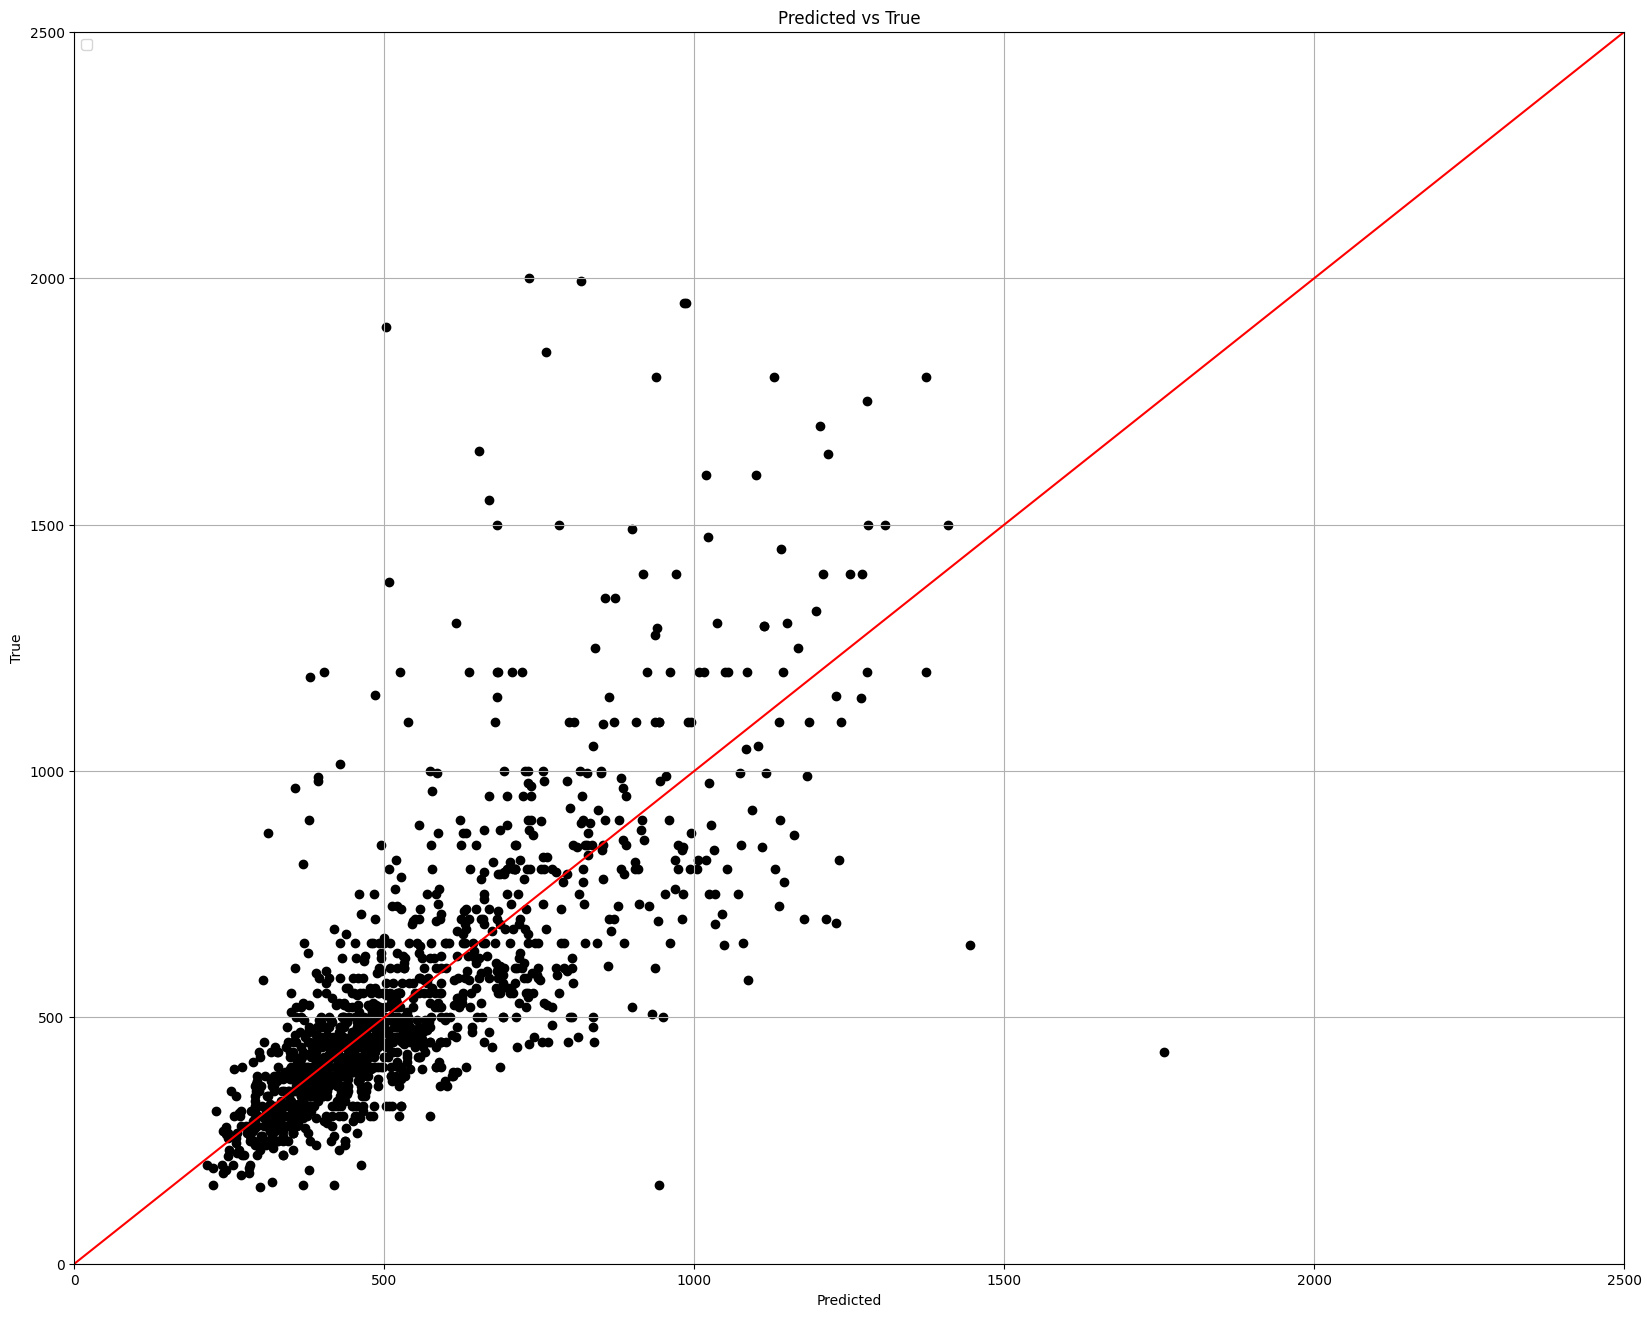

In [23]:
fig, ax = plt.subplots(figsize=(20,16))
from statsmodels.graphics.api import abline_plot
ax.scatter(p2, y_test_t, color="black")
abline_plot(intercept=0, slope=1, color="red", ax=ax)
ax.grid(True)
ax.set(xlabel="Predicted", ylabel="True", title="Predicted vs True")
ax.legend()
plt.xlim(0,2500)
plt.ylim(0,2500)
#plt.savefig('plots/predicted.png')
plt.show()